In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


import warnings
warnings.filterwarnings('ignore')

In [33]:
data01 = pd.read_csv(filepath_or_buffer = "/Yoshinon/Variedades/Universidad 100% real vol 2/Analisis de datos/Tarea 2/data.csv")

In [34]:
data01.head()

,metro,precio
0,5,375
1,15,487
2,20,450
3,25,500


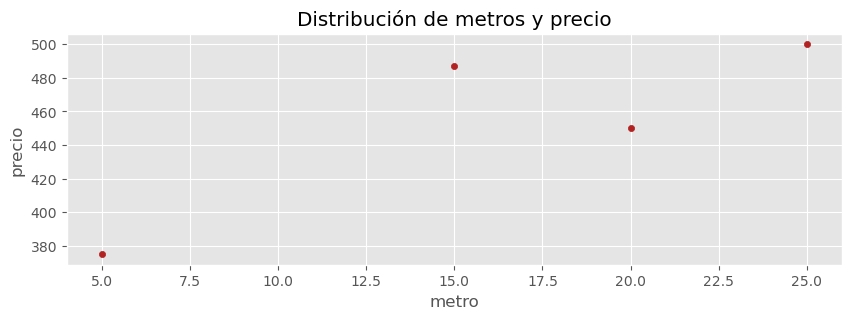

In [35]:
fig, ax = plt.subplots(figsize=(10, 3))
data01.plot(
    x    = 'metro',
    y    = 'precio',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de metros y precio');

In [36]:
corr_test = pearsonr(x = data01['metro'], y =  data01['precio'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.8586047206240953
P-value:  0.1413952793759048


In [37]:
X = data01[['metro']]
y = data01['precio']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [38]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [453.]
Coeficiente: [('metro', 1.3)]
Coeficiente de determinación R^2: 0.1116779445971664


In [39]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[459.5]]

El error (rmse) de test es: 84.5
